In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from private.s3_aws import access_key, secret_access_key

In [3]:
weather_events = pd.read_csv(f"s3://cleandatagrupo07/weather_events.csv",
    storage_options={
        "key": access_key,
        "secret": secret_access_key
    },
)

In [4]:
weather_events

,Unique_City_ID,Year,Month,Type,Precipitation(in),Hours
0,fairhopebaldwinal,2016,1,Cold,0.00,2.333333
1,fairhopebaldwinal,2016,1,Fog,0.00,19.000000
2,fairhopebaldwinal,2016,1,Rain,5.13,45.666667
3,fairhopebaldwinal,2016,2,Fog,0.00,3.000000
4,fairhopebaldwinal,2016,2,Precipitation,0.36,0.333333
...,...,...,...,...,...,...
308799,winchesterfranklintn,2021,10,Precipitation,1.19,0.666667
308800,winchesterfranklintn,2021,11,Fog,0.00,41.000000
308801,winchesterfranklintn,2021,11,Precipitation,0.35,0.333333
308802,winchesterfranklintn,2021,12,Fog,0.00,34.666667


### Weather type

The categorical column type is not numerical so it should be encoded, otherwise the machine learning model won't work.

In [5]:
weather_events.Type.unique()

array(['Cold', 'Fog', 'Rain', 'Precipitation', 'Snow', 'Storm', 'Hail'],
      dtype=object)

In [6]:
df_dummies = pd.get_dummies(weather_events.Type)

In [7]:
df_dummies.drop(['Precipitation'],axis=1,inplace=True)

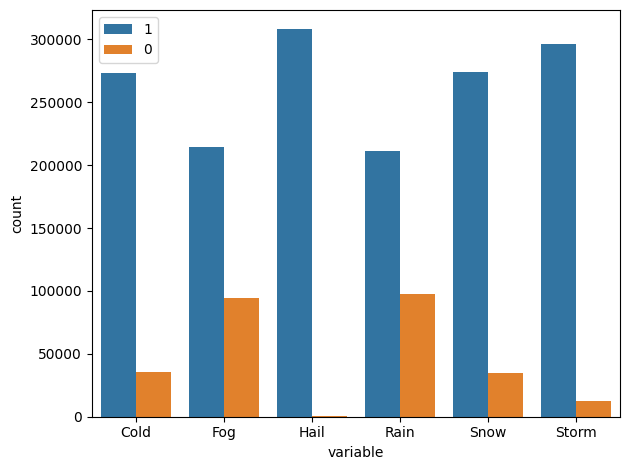

In [8]:
dfm = df_dummies.melt()
ax = sns.countplot(data=dfm, x='variable', hue='value')
ax.legend(labels=['1','0'])
plt.tight_layout()
plt.show()

In [9]:
weather_events = pd.concat([weather_events,df_dummies],axis=1)

In [10]:
weather_events.head()

,Unique_City_ID,Year,Month,Type,Precipitation(in),Hours,Cold,Fog,Hail,Rain,Snow,Storm
0,fairhopebaldwinal,2016,1,Cold,0.00,2.333333,1,0,0,0,0,0
1,fairhopebaldwinal,2016,1,Fog,0.00,19.000000,0,1,0,0,0,0
2,fairhopebaldwinal,2016,1,Rain,5.13,45.666667,0,0,0,1,0,0
3,fairhopebaldwinal,2016,2,Fog,0.00,3.000000,0,1,0,0,0,0
4,fairhopebaldwinal,2016,2,Precipitation,0.36,0.333333,0,0,0,0,0,0


We change the 1s and 0s for the percent of time that the event occured in a given month

A month has 730 hours

In [11]:
weather_events['percentage'] = (weather_events.Hours/730)*100

In [14]:
weather_types = ['Cold', 'Fog', 'Rain', 'Snow', 'Storm', 'Hail']

In [15]:
for i in weather_types:
    weather_events[f'{i}'] = weather_events[f'{i}']*weather_events.percentage

In [16]:
weather_events.drop(['Hours','Type','percentage'],axis=1,inplace=True)

In [17]:
weather_events.head()

,Unique_City_ID,Year,Month,Precipitation(in),Cold,Fog,Hail,Rain,Snow,Storm
0,fairhopebaldwinal,2016,1,0.00,0.102166,0.000000,0.0,0.00000,0.0,0.0
1,fairhopebaldwinal,2016,1,0.00,0.000000,6.774254,0.0,0.00000,0.0,0.0
2,fairhopebaldwinal,2016,1,5.13,0.000000,0.000000,0.0,39.13388,0.0,0.0
3,fairhopebaldwinal,2016,2,0.00,0.000000,0.168887,0.0,0.00000,0.0,0.0
4,fairhopebaldwinal,2016,2,0.36,0.000000,0.000000,0.0,0.00000,0.0,0.0
